In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [41]:
df = pd.read_csv("car_dataset.csv")

In [42]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [43]:
df.shape

(301, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [46]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

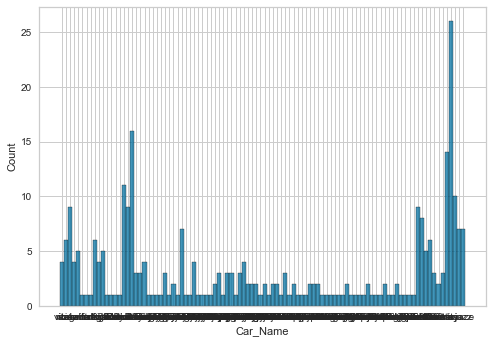

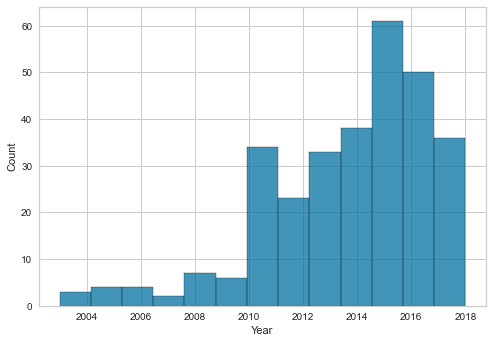

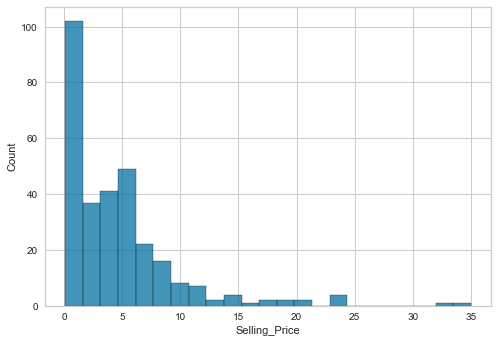

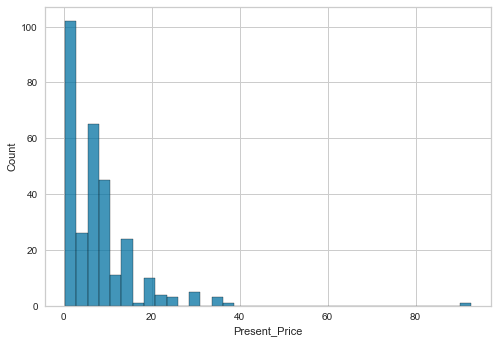

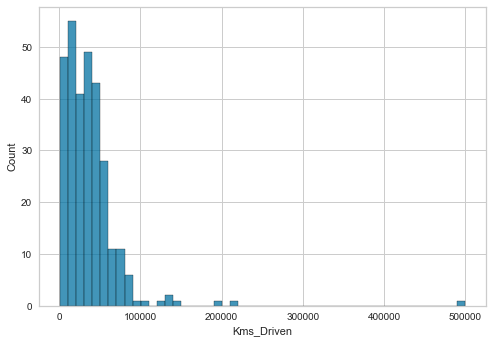

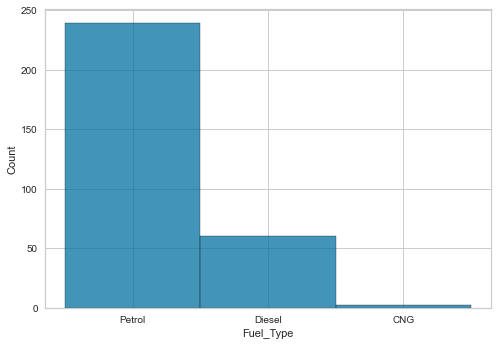

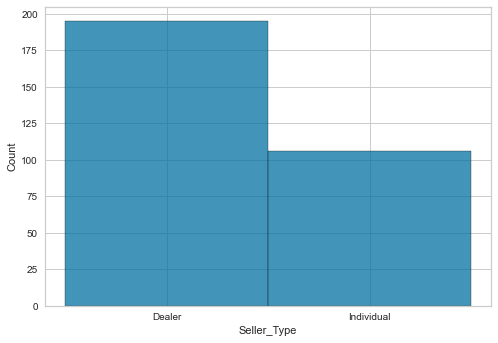

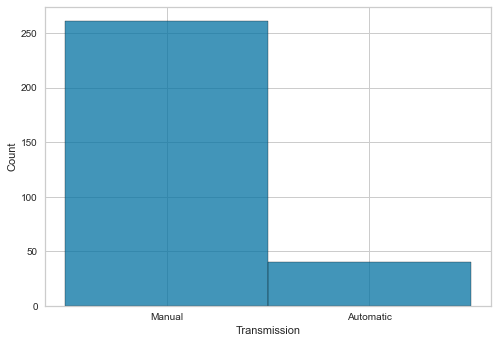

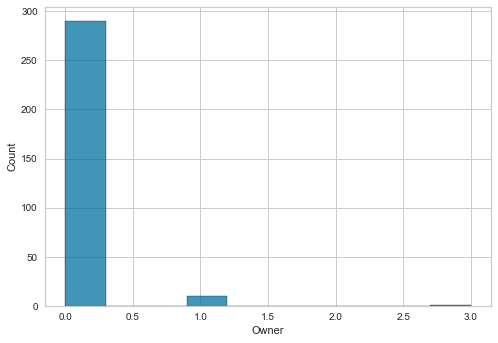

In [47]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

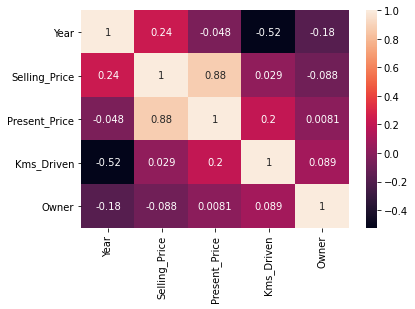

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
df["vehicle_age"]=2021-df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [50]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [51]:
df=pd.get_dummies(df, columns=["Fuel_Type", "Seller_Type", "Transmission"], drop_first=True)

In [52]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [53]:
df.shape

(301, 9)

In [54]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [19]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [20]:
model.intercept_

4.604429051576995

In [21]:
print("Model intercept  : ", model.intercept_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051576995 

Present_Price :  0.4452579698976288
Kms_Driven :  -1.870672975702178e-05
Owner :  -0.8135775776586692
vehicle_age :  -0.3190477645588867
Fuel_Type_Diesel :  2.6192462729450945
Fuel_Type_Petrol :  0.6064868667913325
Seller_Type_Individual :  -1.2201674460429675
Transmission_Manual :  -1.0086828216162707


In [22]:
coeff_df=pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.445258
Kms_Driven,-0.000019
Owner,-0.813578
vehicle_age,-0.319048
Fuel_Type_Diesel,2.619246
Fuel_Type_Petrol,0.606487
Seller_Type_Individual,-1.220167
Transmission_Manual,-1.008683


In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [26]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

In [27]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:25}'.format(R2_score))

Model testing performance:
--------------------------
RMSE is            1.9460540138874813
MAE is             1.1811769157076812
R2 score is        0.8589039971923136


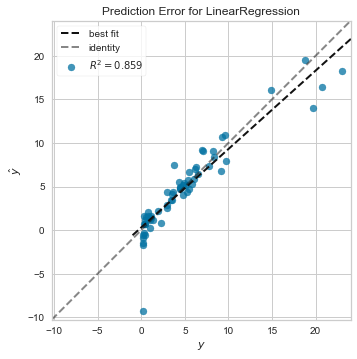

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
282,8.25,9.036746
279,6.25,7.273781
138,0.60,1.493600
50,14.90,16.022866
234,5.50,4.741886


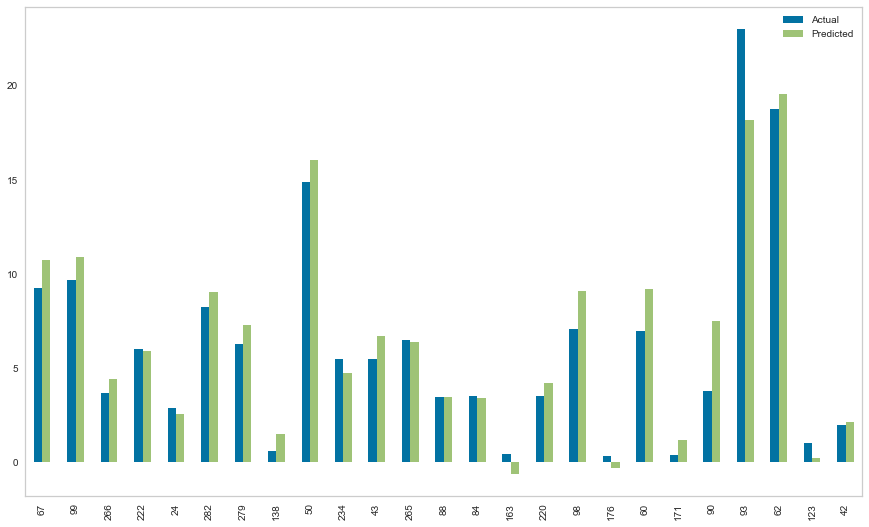

In [30]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

In [31]:
X_test["predicted"]=y_pred
X_test["actual"]=y_test
X_test

<ipython-input-31-5cce4c07d763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["predicted"]=y_pred
<ipython-input-31-5cce4c07d763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["actual"]=y_test


,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,predicted,actual
67,20.450,59000,0,11,1,0,0,1,10.707296,9.25
99,20.450,50024,0,11,1,0,0,1,10.875207,9.65
266,7.000,35000,0,7,0,1,0,1,4.430969,3.65
222,7.600,77632,0,7,1,0,0,1,5.913378,6.00
24,4.410,56879,0,8,0,1,0,1,2.549419,2.90
...,...,...,...,...,...,...,...,...,...,...
25,4.990,20000,0,10,0,1,0,1,2.859458,3.00
181,0.480,50000,0,5,0,1,1,1,0.665214,0.30
194,0.787,50000,0,13,0,1,1,1,-1.750474,0.20
127,0.800,7000,0,5,0,1,1,1,1.612086,0.75


In [32]:
import pickle

In [33]:
pickle.dump(model, open("linear_model", "wb"))

In [34]:
lab=pickle.load(open("linear_model", "rb"))

In [35]:
model

LinearRegression(normalize=True)

In [36]:
lab

LinearRegression(normalize=True)

In [37]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

### Ridge

In [63]:
from sklearn.linear_model import Ridge, RidgeCV

In [64]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
show_metrics(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [61, 240]

In [69]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [70]:
def evaluate_model(Model, lambdas):
    training_errors = []
    testing_errors = []
    for l in lambdas:
        model = Model(alpha=l)
        model.fit(X_train, y_train)
        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)
        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

In [73]:
from sklearn.linear_model import Lasso, LassoCV

In [71]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': np.linspace(0.01, 40, 100),
                'normalize': [True, False],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': range(0,50,3),
                'normalize': [True, False],
                "solver":["auto", "svd", "cholesky"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [74]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.851399,{'normalize': True}
1,lasso,0.856013,"{'alpha': 0.01, 'normalize': True, 'selection'..."
2,ridge,0.851399,"{'alpha': 0, 'normalize': True, 'solver': 'auto'}"
